## Model Selection and Performance Optimization

- Code in this notebook optimizes and compares classification model performance for: 
    - Logistic Regression
    - K-Nearest Neighbors (KNN)
    - Naive Bayes Classifier
    - Decision Tree Classifier
    - Random Forest Classifier

### Imports

In [202]:
import numpy as np
import pandas as pd

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

%matplotlib inline

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Performance metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

### Load Master DataFrame

In [2]:
# Read in master dataframe
df_master = pd.read_csv('df_master.csv')

In [3]:
# Delete unnecessary column
df_master = df_master.drop('Unnamed: 0', axis = 1)

In [4]:
# View number of rows and columns in dataframe
df_master.shape

(124281, 95)

In [156]:
# View first 5 rows of dataframe
df_master.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,pitch_type_FS,pitch_type_FT,pitch_type_KC,pitch_type_KN,pitch_type_SI,pitch_type_SL,pitcher_hitter_position_L -Pitcher L -Hitter,pitcher_hitter_position_L -Pitcher R -Hitter,pitcher_hitter_position_R -Pitcher L -Hitter,pitcher_hitter_position_R -Pitcher R -Hitter
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,0,0,0,0,0,0,1,0,0,0
1,-1.088,1.610,93.3,85.3,2848.535,147.044,-46.3,3.6,23.7,14.549,...,0,0,0,0,0,0,1,0,0,0
2,1.470,2.350,92.1,85.0,2666.090,146.146,-45.0,4.0,23.8,13.808,...,0,0,0,0,0,0,0,1,0,0
3,-1.337,1.898,89.3,82.0,1384.143,174.388,2.0,4.9,23.8,1.218,...,0,0,0,0,0,0,0,1,0,0
4,-1.539,1.525,91.6,84.5,2248.792,154.853,-23.8,3.6,23.8,8.804,...,0,0,0,0,0,0,1,0,0,0


In [157]:
# Convenience code to save updated dataframe
# df_master.to_csv('df_master_features.csv')

### Select Relevant Features

In [6]:
# Create copy of master dataframe for selected features
df_master_features = df_master.copy()

In [7]:
# Keep 's_b_count', 'outs', 'pitch_count', 'runners_on_base', 'p_score', 'pitch_type' and 'pitcher_batter_position' features
df_master_features = \
    df_master \
    [['s_b_count_0.0 Strike(s) 1.0 Ball(s)',
       's_b_count_0.0 Strike(s) 2.0 Ball(s)',
       's_b_count_0.0 Strike(s) 3.0 Ball(s)',
       's_b_count_1.0 Strike(s) 0.0 Ball(s)',
       's_b_count_1.0 Strike(s) 1.0 Ball(s)',
       's_b_count_1.0 Strike(s) 2.0 Ball(s)',
       's_b_count_1.0 Strike(s) 3.0 Ball(s)', 'outs', 'pitch_count', 'runners_on_base_0.0 1st Base 0.0 2nd Base 0.0 3rd Base',
       'runners_on_base_0.0 1st Base 0.0 2nd Base 1.0 3rd Base',
       'runners_on_base_0.0 1st Base 1.0 2nd Base 0.0 3rd Base',
       'runners_on_base_0.0 1st Base 1.0 2nd Base 1.0 3rd Base',
       'runners_on_base_1.0 1st Base 0.0 2nd Base 0.0 3rd Base',
       'runners_on_base_1.0 1st Base 0.0 2nd Base 1.0 3rd Base',
       'runners_on_base_1.0 1st Base 1.0 2nd Base 0.0 3rd Base',
       'runners_on_base_1.0 1st Base 1.0 2nd Base 1.0 3rd Base', 'p_score', 'pitch_type_CU', 'pitch_type_FC', 'pitch_type_FF', 'pitch_type_FS',
       'pitch_type_FT', 'pitch_type_KC', 'pitch_type_KN', 'pitch_type_SI',
       'pitch_type_SL', 'pitcher_hitter_position_L -Pitcher L -Hitter',
       'pitcher_hitter_position_L -Pitcher R -Hitter',
       'pitcher_hitter_position_R -Pitcher L -Hitter',
       'pitcher_hitter_position_R -Pitcher R -Hitter']]

In [9]:
# View number of rows and columns in dataframe
df_master_features.shape

(124281, 33)

In [10]:
# View distribution of target (1 = ball, 0 = strike)
target_pcts = df_master_features.pitch_target.value_counts(normalize=True) 
print(target_pcts)

0    0.616241
1    0.383759
Name: pitch_target, dtype: float64


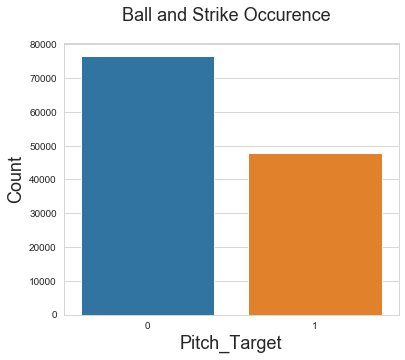

In [11]:
# Plot Class Distribution of Target Variable
legend_labels = ['Balls', 'Strikes']

sns.set_style("whitegrid")

# Set plot size
plt.figure(figsize=(6,5))

sns.countplot(x='pitch_target', data=df_master_features)

# Style graph
plt.suptitle('Ball and Strike Occurence', size=18)
plt.xlabel('Pitch_Target', fontsize=18)
plt.ylabel('Count', fontsize=18)
# plt.xticks(rotation=45);

plt.savefig('target_distribution.png')

In [12]:
# Define features and targets
X = df_master_features.drop(['pitch_target'], axis=1)
y = df_master_features['pitch_target']

In [13]:
# Split data into train/holdout 
X_tr, X_holdout, y_tr, y_holdout = train_test_split(X, y, test_size=0.3, random_state=2)

In [14]:
# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.3, random_state=2)

In [15]:
# Create list of model and accuracy dicts
list_of_perform = []

# List to keep track of models
models = []

# List to keep track of y_scores
y_scores = []

### Model Optimization and Comparison 

#### Logistic Regression (Baseline)

In [15]:
# Instantiate model
lr_baseline = LogisticRegression(class_weight='balanced', random_state=1)

# Calculate accuracy of train
lr_base_acc = cross_val_score(lr_baseline, X_train, y_train).mean()
lr_base_std = cross_val_score(lr_baseline, X_train, y_train).std()
print('Accuracy of log reg baseline (TRAIN): {} +/- {}'.format(round(lr_base_acc, 3), round(lr_base_std, 3)))

# Fit model
lr_baseline.fit(X_train, y_train)

# Get predictions and probabilities
lr_base_preds = lr_baseline.predict(X_test)
lr_base_y_score = lr_baseline.predict_proba(X_test)

# Calculate accuracy of test
lr_base_acc_test = round(accuracy_score(y_test, lr_base_preds), 3)
print(f'Accuracy of log reg baseline (TEST): {lr_base_acc_test}')

print()

# Get precision, recall, f1-score
precision = precision_score(y_test, lr_base_preds)
recall = recall_score(y_test, lr_base_preds)
fscore = f1_score(lr_base_preds, y_test)
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'LogReg Base'),
    ('Train Accuracy', round(lr_base_acc, 3)),
    ('Test Accuracy', lr_base_acc_test),
    ('Precision', round(precision, 3)),
    ('Recall', round(recall, 3)),
    ('F1', round(fscore, 3))
     ]))

# Add model to list
models.append('LogReg Base')

# Add y_score to list
y_scores.append(lr_base_y_score)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

Accuracy of log reg baseline (TRAIN): 0.582 +/- 0.004
Accuracy of log reg baseline (TEST): 0.584

Precision : 0.47390805373658274
Recall    : 0.6952560166386055
F-score   : 0.5636290646326776


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Logistic Regression (Grid Search)

In [16]:
# Define the parameter values that should be searched
C_range = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 10, 40, 50, 60, 100, 1000]
fit_intercept_range = [True, False]

print(C_range,
      fit_intercept_range)

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 40, 50, 60, 100, 1000] [True, False]


In [17]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=C_range,
                  fit_intercept=fit_intercept_range, )
print(param_grid)

{'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 40, 50, 60, 100, 1000], 'fit_intercept': [True, False]}


In [18]:
# Instantiate and fit the grid
lr_grid = GridSearchCV(lr_baseline, param_grid)
lr_grid.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                               10, 40, 50, 60, 100, 1000],
                         'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
# View best parameter
print('Best parameters found:')
print()
print(lr_grid.best_params_)

Best parameters found:

{'C': 1e-07, 'fit_intercept': False}


In [16]:
# Instantiate model
lr_opt = LogisticRegression(fit_intercept=False, class_weight='balanced', random_state=1)

# Calculate accuracy of train
lr_opt_acc = cross_val_score(lr_opt, X_train, y_train).mean()
lr_opt_std = cross_val_score(lr_opt, X_train, y_train).std()
print('Accuracy of log reg optimized (TRAIN): {} +/- {}'.format(round(lr_opt_acc, 3), round(lr_opt_std, 3)))

# Fit model
lr_opt.fit(X_train, y_train)

# Get predictions and probabilities
lr_opt_preds = lr_opt.predict(X_test)
lr_opt_y_score = lr_opt.predict_proba(X_test)

# Calculate accuracy of test
lr_opt_acc_test = round(accuracy_score(y_test, lr_opt_preds), 3)
print(f'Accuracy of log reg optimized (TEST): {lr_opt_acc_test}')

print()

# Get precision, recall, f1-score
precision = precision_score(y_test, lr_opt_preds)
recall = recall_score(y_test, lr_opt_preds)
fscore = f1_score(lr_opt_preds, y_test)
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'Logistic Regression GSCV'),
    ('Train_Accuracy', round(lr_opt_acc, 3)),
    ('Test_Accuracy', lr_opt_acc_test),
    ('Precision', round(precision, 3)),
    ('Recall', round(recall, 3)),
    ('F1', round(fscore, 3))
     ]))

# Add model to list
models.append('Logistic Regression GSCV')

# Add y_score to list
y_scores.append(lr_opt_y_score)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

Accuracy of log reg optimized (TRAIN): 0.583 +/- 0.004
Accuracy of log reg optimized (TEST): 0.581

Precision : 0.4717546077583339
Recall    : 0.7021887689412697
F-score   : 0.5643556475364165


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### K-Nearest Neighbors (KNN)

In [17]:
# Instantiate model
neigh_base = KNeighborsClassifier()

# Calculate accuracy of train
neigh_base_acc = cross_val_score(neigh_base, X_train, y_train).mean()
neigh_base_std = cross_val_score(neigh_base, X_train, y_train).std()
print('Accuracy of KNN (TRAIN): {} +/- {}'.format(round(neigh_base_acc, 3), round(neigh_base_std, 3)))

# Fit model
neigh_base.fit(X_train, y_train)

# Get predictions and probabilities
neigh_base_preds = neigh_base.predict(X_test)
neigh_base_y_score = neigh_base.predict_proba(X_test)

# Calculate accuracy of test
neigh_base_acc_test = round(accuracy_score(y_test, neigh_base_preds), 3)
print(f'Accuracy of KNN (TEST): {neigh_base_acc_test}')

print()

# Get precision, recall, f1-score
precision = precision_score(y_test, neigh_base_preds)
recall = recall_score(y_test, neigh_base_preds)
fscore = f1_score(neigh_base_preds, y_test)
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'KNN GSCV'),
    ('Train_Accuracy', round(neigh_base_acc, 3)),
    ('Test_Accuracy', neigh_base_acc_test),
    ('Precision', round(precision, 3)),
    ('Recall', round(recall, 3)),
    ('F1', round(fscore, 3))
     ]))

# Add model to list
models.append('KNN GSCV')

# Add y_score to list
y_scores.append(neigh_base_y_score)

Accuracy of KNN (TRAIN): 0.563 +/- 0.004
Accuracy of KNN (TEST): 0.563

Precision : 0.42258481042375867
Recall    : 0.3565415469941567
F-score   : 0.3867640739149119


#### Naive Bayes Classifier

In [18]:
# Instantiate the model
nbc_base = GaussianNB()

# Calculate accuracy of train
nbc_base_acc = cross_val_score(nbc_base, X_train, y_train).mean()
nbc_base_std = cross_val_score(nbc_base, X_train, y_train).std()
print('Accuracy of Naive Bayes Classifier (TRAIN): {} +/- {}'.format(round(nbc_base_acc, 3), round(nbc_base_std, 3)))

# Fit model
nbc_base.fit(X_train, y_train)

# Get predictions and probabilities
nbc_base_preds = nbc_base.predict(X_test)
nbc_base_y_score = nbc_base.predict_proba(X_test)

# Calculate accuracy of test
nbc_base_acc_test = round(accuracy_score(y_test, nbc_base_preds), 3)
print(f'Accuracy of Naive Bayes Classifier (TEST): {nbc_base_acc_test}')

print()

# Get precision, recall, f1-score
precision = precision_score(y_test, nbc_base_preds)
recall = recall_score(y_test, nbc_base_preds)
fscore = f1_score(nbc_base_preds, y_test)
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'Naive Bayes'),
    ('Train_Accuracy', round(nbc_base_acc, 3)),
    ('Test_Accuracy', nbc_base_acc_test),
    ('Precision', round(precision, 3)),
    ('Recall', round(recall, 3)),
    ('F1', round(fscore, 3))
     ]))

# Add model to list
models.append('Naive Bayes')

# Add y_score to list
y_scores.append(nbc_base_y_score)

Accuracy of Naive Bayes Classifier (TRAIN): 0.59 +/- 0.002
Accuracy of Naive Bayes Classifier (TEST): 0.588

Precision : 0.47603462069968727
Recall    : 0.6482123402990987
F-score   : 0.5489390254130672


#### Decision Tree Classifier (Baseline)

In [23]:
# Instantiate the model
dt_base = DecisionTreeClassifier(class_weight='balanced', random_state=1)

# Calculate accuracy of train
dt_base_acc = cross_val_score(dt_base, X_train, y_train).mean()
dt_base_std = cross_val_score(dt_base, X_train, y_train).std()
print('Accuracy of Decision Tree baseline (TRAIN): {} +/- {}'.format(round(dt_base_acc, 3), round(dt_base_std, 3)))

# Fit model
dt_base.fit(X_train, y_train)

# Get predictions and probabilities
dt_base_preds = dt_base.predict(X_test)
dt_base_y_score = dt_base.predict_proba(X_test)

# Calculate accuracy of test
dt_base_acc = round(accuracy_score(y_test, dt_base_preds), 3)
print(f'Accuracy of Decision Tree baseline (TEST): {dt_base_acc}')

print()

# Get precision, recall, f1-score
precision = precision_score(y_test, dt_base_preds)
recall = recall_score(y_test, dt_base_preds)
fscore = f1_score(dt_base_preds, y_test)
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'DecTree Base'),
    ('Train Accuracy', round(dt_base_acc, 3)),
    ('Test Accuracy', dt_base_acc),
    ('Precision', round(precision, 3)),
    ('Recall', round(recall, 3)),
    ('F1', round(fscore, 3))
     ]))

# Add model to list
models.append('DecTree Base')

# Add y_score to list
y_scores.append(dt_base_y_score)

Accuracy of Decision Tree baseline (TRAIN): 0.555 +/- 0.004
Accuracy of Decision Tree baseline (TEST): 0.551

Precision : 0.42413503683670617
Recall    : 0.4504308210359513
F-score   : 0.43688760806916427


#### Decision Tree (Grid Search)

In [24]:
# Define parameters to be searched
criterion_range = ['gini', 'entropy']
splitter_range = ['best', 'random']
max_depth_range = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_split_range = [10, 20, 50, 100, 500]
min_samples_leaf_range = [10, 20, 50, 100, 250, 500]

print(criterion_range,
      splitter_range,
      max_depth_range,
      min_samples_split_range,
      min_samples_leaf_range
)

['gini', 'entropy'] ['best', 'random'] [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [10, 20, 50, 100, 500] [10, 20, 50, 100, 250, 500]


In [25]:
# Create parameter grid: map the parameter names to the values to be searched
param_grid_4 = dict(criterion=criterion_range,
                    splitter=splitter_range,
                    max_depth=max_depth_range,
                    min_samples_split=min_samples_split_range,
                    min_samples_leaf=min_samples_leaf_range
)

print(param_grid_4)

{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [10, 20, 50, 100, 500], 'min_samples_leaf': [10, 20, 50, 100, 250, 500]}


In [26]:
# Instantiate the grid
dt_grid = GridSearchCV(dt_base, param_grid_4)

# Fit the model
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
             

In [27]:
# View best parameters
print('Best parameters found:')
print()
print(dt_grid.best_params_)

Best parameters found:

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 250, 'min_samples_split': 10, 'splitter': 'best'}


In [19]:
# Instantiate the model
dt_opt = DecisionTreeClassifier(class_weight='balanced', criterion='gini', splitter='best', max_depth=None,
                                min_samples_split=10, min_samples_leaf=250, random_state=1)

# Calculate accuracy
dt_opt_acc = cross_val_score(dt_opt, X_train, y_train).mean()
dt_opt_std = cross_val_score(dt_opt, X_train, y_train).std()
print('Accuracy of Decision Tree optimized (TEST): {} +/- {}'.format(round(dt_opt_acc, 3), round(dt_opt_std, 3)))

# Fit model
dt_opt.fit(X_train, y_train)

# Get predictions and probabilities
dt_opt_preds = dt_opt.predict(X_test)
dt_opt_y_score = dt_opt.predict_proba(X_test)

# Calculate accuracy of test
dt_opt_acc_test = round(accuracy_score(y_test, dt_opt_preds), 3)
print(f'Accuracy of Decision Tree optimized (TEST): {dt_opt_acc_test}')

print()

# Get precision, recall, f1-score
precision = precision_score(y_test, dt_opt_preds)
recall = recall_score(y_test, dt_opt_preds)
fscore = f1_score(dt_opt_preds, y_test)
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'Decision Tree GSCV'),
    ('Train_Accuracy', round(dt_opt_acc, 3)),
    ('Test_Accuracy', dt_opt_acc_test),
    ('Precision', round(precision, 3)),
    ('Recall', round(recall, 3)),
    ('F1', round(fscore, 3))
     ]))

# Add model to list
models.append('Decision Tree GSCV')

# Add y_score to list
y_scores.append(dt_opt_y_score)

Accuracy of Decision Tree optimized (TEST): 0.585 +/- 0.003
Accuracy of Decision Tree optimized (TEST): 0.584

Precision : 0.47289561099724364
Recall    : 0.662672080816084
F-score   : 0.5519260909015922


#### Random Forest Classifier (Baseline)

In [21]:
# Instantiate the model
rf_base = RandomForestClassifier(class_weight='balanced', random_state=1)

# Calculate accuracy of train
rf_base_acc = cross_val_score(rf_base, X_train, y_train).mean()
rf_base_std = cross_val_score(rf_base, X_train, y_train).std()
print('Accuracy of Random Forest baseline (TRAIN): {} +/- {}'.format(round(rf_base_acc, 3), round(rf_base_std, 3)))

# Fit model
rf_base.fit(X_train, y_train)

# Get predictions and probabilities
rf_base_preds = rf_base.predict(X_test)
rf_base_y_score = rf_base.predict_proba(X_test)

# Calculate accuracy of test
rf_base_acc_test = round(accuracy_score(y_test, rf_base_preds), 3)
print(f'Accuracy of Random Forest baseline (TEST): {rf_base_acc_test}')

print()

# Get precision, recall, f1-score
precision = precision_score(y_test, rf_base_preds)
recall = recall_score(y_test, rf_base_preds)
fscore = f1_score(rf_base_preds, y_test)
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'RandFor Base'),
    ('Train Accuracy', round(rf_base_acc, 3)),
    ('Test Accuracy', rf_base_acc_test),
    ('Precision', round(precision, 3)),
    ('Recall', round(recall, 3)),
    ('F1', round(fscore, 3))
     ]))

# Add model to list
models.append('RandFor Base')

# Add y_score to list
y_scores.append(rf_base_y_score)

Accuracy of Random Forest baseline (TRAIN): 0.591 +/- 0.004
Accuracy of Random Forest baseline (TEST): 0.591

Precision : 0.4647751863428709
Recall    : 0.3828860057442805
F-score   : 0.41987510181916915


#### Random Forest (Random Search)

In [22]:
# Define parameters to be searched
n_estimators_range = [x for x in range(1,31)]
criterion_range = ['gini', 'entropy']
max_features_range = [None, 'auto', 'log2', 1, 2, 3, 4, 5, 6, 7, 8]
max_depth_range = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_split_range = [10, 20, 50, 100, 500]
min_samples_leaf_range = [10, 20, 50, 100, 250, 500]
bootstrap_range = [True, False]

# Create parameter grid: map the parameter names to the values to be searched
param_rand_rf = dict(n_estimators=n_estimators_range,
                     criterion=criterion_range,
                     max_features=max_features_range,
                     max_depth=max_depth_range,
                     min_samples_split=min_samples_split_range,
                     min_samples_leaf=min_samples_leaf_range,
                     bootstrap=bootstrap_range
)

print(param_rand_rf)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'criterion': ['gini', 'entropy'], 'max_features': [None, 'auto', 'log2', 1, 2, 3, 4, 5, 6, 7, 8], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [10, 20, 50, 100, 500], 'min_samples_leaf': [10, 20, 50, 100, 250, 500], 'bootstrap': [True, False]}


In [23]:
# Choose number of searches
n_iter_search = 40

# Instantiate the model
rf_random_search = RandomizedSearchCV(rf_base, param_distributions=param_rand_rf, n_iter=n_iter_search)

# Fit the model
rf_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
      

In [25]:
# View best parameters
print('Best parameters found:')
print()
print(rf_random_search.best_params_)

Best parameters found:

{'n_estimators': 20, 'min_samples_split': 50, 'min_samples_leaf': 250, 'max_features': 2, 'max_depth': 2, 'criterion': 'gini', 'bootstrap': False}


In [20]:
# Instantiate the model
rf_opt = RandomForestClassifier(class_weight='balanced',
                                n_estimators=20,
                                criterion='gini',
                                max_features=2,
                                max_depth=2,
                                min_samples_split=50,
                                min_samples_leaf=250,
                                bootstrap=False,
                                random_state=1)

# Calculate the accuracy of train
rf_opt_acc = cross_val_score(rf_opt, X_train, y_train).mean()
rf_opt_std = cross_val_score(rf_opt, X_train, y_train).std()
print('Accuracy of Random Forest optimized (TRAIN): {} +/- {}'.format(round(rf_opt_acc, 3), round(rf_opt_std, 3)))

# Fit model
rf_opt.fit(X_train, y_train)

# Get predictions and probabilities
rf_opt_preds = rf_opt.predict(X_test)
rf_opt_y_score = rf_opt.predict_proba(X_test)

# Calculate accuracy of test
rf_opt_acc_test = round(accuracy_score(y_test, rf_opt_preds), 3)
print(f'Accuracy of Random Forest optimized (TEST): {rf_opt_acc_test}')

print()

# Get precision, recall, f1-score
precision = precision_score(y_test, rf_opt_preds)
recall = recall_score(y_test, rf_opt_preds)
fscore = f1_score(rf_opt_preds, y_test)
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'Random Forest RS'),
    ('Train_Accuracy', round(rf_opt_acc, 3)),
    ('Test_Accuracy', rf_opt_acc_test),
    ('Precision', round(precision, 3)),
    ('Recall', round(recall, 3)),
    ('F1', round(fscore, 3))
     ]))

# Add model to list
models.append('Random Forest RS')

# Add y_score to list
y_scores.append(rf_opt_y_score)

Accuracy of Random Forest optimized (TRAIN): 0.594 +/- 0.004
Accuracy of Random Forest optimized (TEST): 0.599

Precision : 0.4845936109987869
Recall    : 0.593443597108052
F-score   : 0.5335232837681418


### Compare Model Performances

In [107]:
# Create dataframe of accuracy and precision scores for each model
model_perf = pd.DataFrame(data=list_of_perform)
model_perf = model_perf[['Model', 'Train_Accuracy', 'Test_Accuracy', 'Precision']]
model_perf.drop_duplicates(inplace=True)
model_perf.drop
model_perf

,Model,Train_Accuracy,Test_Accuracy,Precision
0,Logistic Regression GSCV,0.583,0.581,0.472
1,KNN GSCV,0.563,0.563,0.423
2,Naive Bayes,0.590,0.588,0.476
3,Decision Tree GSCV,0.585,0.584,0.473
4,Random Forest RS,0.594,0.599,0.485


In [108]:
# Create a copy of the dataframe
model_perf2 = model_perf

In [111]:
# Sort dataframe by precision scores
# Random Forest RS yields the best accuracy and precision scores
model_perf2.sort_values('Precision', inplace=True)
model_perf2

,Model,Train_Accuracy,Test_Accuracy,Precision
1,KNN GSCV,0.563,0.563,0.423
0,Logistic Regression GSCV,0.583,0.581,0.472
3,Decision Tree GSCV,0.585,0.584,0.473
2,Naive Bayes,0.590,0.588,0.476
4,Random Forest RS,0.594,0.599,0.485


### Holdout Test

In [115]:
holdout_acc = []

# Get predictions and probabilities
rf_holdout_preds = rf_opt.predict(X_holdout)
rf_holdout_y_score = rf_opt.predict_proba(X_holdout)

# Use X_holdout, y_holdout to calculate accuracy
rf_holdout_acc = round(accuracy_score(y_holdout, rf_holdout_preds), 3)
print(f'Accuracy of Random Forest Opt (holdout): {rf_holdout_acc}')

rf_holdout_prec = round(precision_score(y_holdout, rf_holdout_preds), 3)
print(f'Precision of Random Forest Opt (holdout): {rf_holdout_prec}')

# Add model and accuracy dict to list
holdout_acc.append(dict([
    ('Model', 'Random Forest RS'),
    ('Holdout Accuracy', rf_holdout_acc),
    ('Holdout Precision', rf_holdout_prec)
]))

Accuracy of Random Forest Opt (holdout): 0.598
Precision of Random Forest Opt (holdout): 0.475


In [116]:
# Reorder columns and rows
holdout_results = pd.DataFrame(data=holdout_acc, columns=['Model', 'Holdout Accuracy', 'Holdout Precision'])

In [117]:
# Show holdout results for optimized random forest model
holdout_results

,Model,Holdout Accuracy,Holdout Precision
0,Random Forest RS,0.598,0.475


### Feature Importance Scores

In [143]:
# View feature importances
feature_importance = pd.DataFrame({
    'Feature': X_holdout.columns,
    'Importance': rf_opt.feature_importances_
})

In [147]:
# Sort from most important to least
feature_importance.sort_values('Importance', ascending=False, inplace=True)
feature_importance

,Feature,Importance
5,s_b_count_1.0 Strike(s) 2.0 Ball(s),0.154275
9,runners_on_base_0.0 1st Base 0.0 2nd Base 0.0 ...,0.124878
1,s_b_count_0.0 Strike(s) 2.0 Ball(s),0.123122
8,pitch_count,0.085216
2,s_b_count_0.0 Strike(s) 3.0 Ball(s),0.079070
3,s_b_count_1.0 Strike(s) 0.0 Ball(s),0.064507
21,pitch_type_FS,0.058226
11,runners_on_base_0.0 1st Base 1.0 2nd Base 0.0 ...,0.050122
12,runners_on_base_0.0 1st Base 1.0 2nd Base 1.0 ...,0.045847
20,pitch_type_FF,0.039941


In [146]:
# Make a copy of feature importance dataframe
feature_importance2 = feature_importance

In [148]:
# Keep top 12 features
feature_importance2.drop(feature_importance.tail(20).index,inplace=True)

In [159]:
feature_importance2

,Feature,Importance
5,s_b_count_1.0 Strike(s) 2.0 Ball(s),0.154275
9,runners_on_base_0.0 1st Base 0.0 2nd Base 0.0 ...,0.124878
1,s_b_count_0.0 Strike(s) 2.0 Ball(s),0.123122
8,pitch_count,0.085216
2,s_b_count_0.0 Strike(s) 3.0 Ball(s),0.079070
3,s_b_count_1.0 Strike(s) 0.0 Ball(s),0.064507
21,pitch_type_FS,0.058226
11,runners_on_base_0.0 1st Base 1.0 2nd Base 0.0 ...,0.050122
12,runners_on_base_0.0 1st Base 1.0 2nd Base 1.0 ...,0.045847
20,pitch_type_FF,0.039941


In [158]:
# Save feature importance dataframe to csv file
feature_importance2.to_csv('feature_importance2.csv')

### Confusion Matrix

In [ ]:
# Get predictions and probabilities
rf_holdout_preds = rf_opt.predict(X_holdout)
rf_holdout_y_score = rf_opt.predict_proba(X_holdout)

# Use X_holdout, y_holdout to calculate accuracy
rf_holdout_acc = round(accuracy_score(y_holdout, rf_holdout_preds), 3)
print(f'Accuracy of Random Forest Opt (holdout): {rf_holdout_acc}')

rf_holdout_prec = round(precision_score(y_holdout, rf_holdout_preds), 3)
print(f'Precision of Random Forest Opt (holdout): {rf_holdout_prec}')

In [171]:
# Define function to plot normalized confusion matrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, x_train,y_train, x_test, y_test, cmap=plt.cm.Blues):
    y_pred = model.fit(x_train, y_train).predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm_normalized)
    fig=plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
    plt.title('Normalized Confusion Matrix', fontsize=16)
    plt.colorbar()
    plt.xticks([0,1],['Negative diagnosis','Positive Diagnosis'],fontsize=12)
    plt.yticks([0,1],['Negative diagnosis','Positive Diagnosis'],fontsize=12)
    plt.tight_layout()
    plt.ylabel('True label',fontsize=14,weight='bold',rotation=90)
    plt.xlabel('Predicted label',fontsize=14,weight='bold')
    ax.grid(b=False)
    ax.xaxis.labelpad = 20
    labels=['True Negative','False Positive','False Negative','True Positive']
    for i, cas in enumerate(cm_normalized):
        for j, c in enumerate(cas):
            plt.text(j-.15, i+.05, round(c,2), fontsize=20,color='black',weight='bold')

[[0.60438517 0.39561483]
 [0.41187305 0.58812695]]


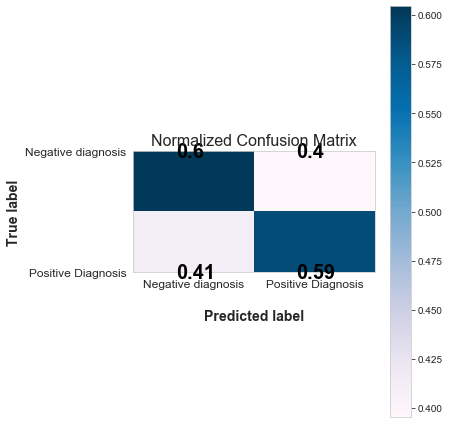

In [172]:
plot_confusion_matrix(rf_opt, X_train, y_train, X_holdout, y_holdout, cmap=plt.cm.PuBu)

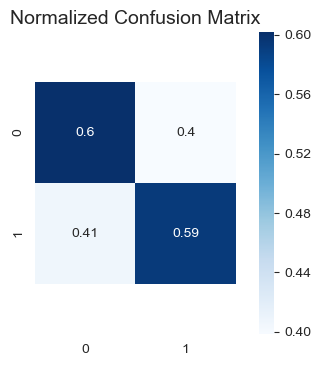

In [200]:
# Format normalized confusion matrix for better visibility
rf_opt.fit(X_train, y_train)

cm = confusion_matrix(y_test, rf_opt.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(dpi=100)
sns.heatmap(cm_normalized, cmap=plt.cm.Blues, annot=True, square=True)
plt.title('Normalized Confusion Matrix', fontsize=14)
ax.grid(b=False)
ax.xaxis.labelpad = 10
labels=['True Negative','False Positive','False Negative','True Positive']
plt.gca().set_ylim(len(confusion)+0.5, -0.5)

plt.savefig('confusion_matrix2.png')

In [199]:
# Save confusion matrix image
plt.savefig('confusion_matrix.png')

<Figure size 432x288 with 0 Axes>

### Precision / Recall Curve

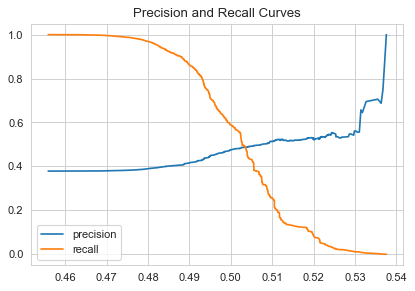

In [205]:
# Plot the curve showing how recall and precision thresholds trade off 
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_holdout, rf_opt.predict_proba(X_holdout)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.title('Precision and Recall Curves');
plt.savefig('precision_recall_curve.png')